# Split dataset in training and test

https://github.com/codificandobits/prediction_de_acciones_en_la_bolsa_con_redes_LSTM

Training len: 125
Test len: 57


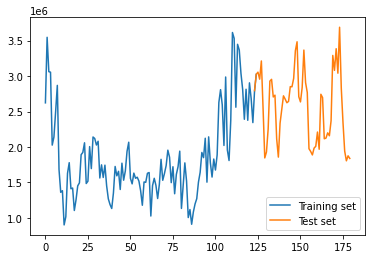

In [73]:
import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

# Data read
dataset = pd.read_csv('clean_dataset_20160109.csv')
dataset.head()

training_percentatge = 0.7 # You could decide the percentatge for training (70%).
dataset_len = len(dataset)
training_len  = int(np.floor(dataset_len*0.7))
test_len = dataset_len - training_len

training_set = dataset[0:training_len].iloc[:,1:2]
print("Training len: {}".format(len(training_set)))

# We create a test set to compare it with the predicted values.
test_set = dataset[training_len - 2:training_len + test_len].iloc[:,1:2]
print("Test len: {}".format(len(test_set)))

training_set['B'].plot(legend=True)
test_set['B'].plot(legend=True)
plt.legend(['Training set', 'Test set'])
plt.show()


# Creating the model

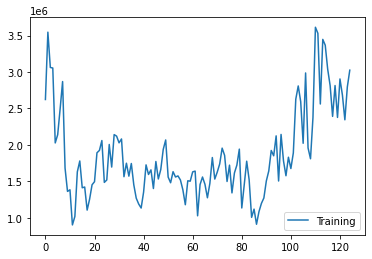

Epoch 1/200
4/4 [==============================] - 2s 3ms/step - loss: 0.1336
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1201
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1023
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0950
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0882
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 105/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 106/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 109/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 114/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 115/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 116/200
4/4 [==============================] - 0

In [74]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


training_set['B'].plot(legend=True)
plt.legend(['Training'])
plt.show()

# training_set normalisation 
sc = MinMaxScaler(feature_range=(0,1))
scalar_training_set = sc.fit_transform(training_set)

time_step = 2 #Number of consecutive data
X_train = []
Y_train = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: blocks of "time_step" values: 0-time_step, 1-time_step+1, 2-time_step+2...
    X_train.append(scalar_training_set[i-time_step:i,0])

    # Y: next value
    Y_train.append(scalar_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train (for Keras)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# LSTM
dim_in = (X_train.shape[1],1)
dim_out = 1
na = 10

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in))
model.add(Dense(units=dim_out))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train,Y_train,epochs=200,batch_size=32)

# Validation

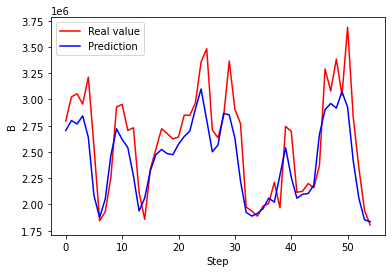

In [78]:
#
# Auxiliar functions.
#
def graph_predictions(real, prediction):
    plt.plot(real[0:len(prediction)],color='red', label='Real value')
    plt.plot(prediction, color='blue', label='Prediction')
    # plt.ylim(1.1 * np.min(prediction)/2, 1.1 * np.max(prediction))
    plt.xlabel('Step')
    plt.ylabel('B')
    plt.legend()
    plt.show()

#
# Validation.
#
x_test = test_set.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)

#print(prediction)

graph_predictions(test_set.values,prediction)

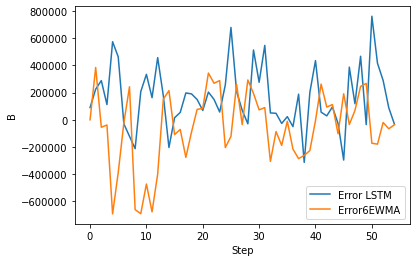

In [76]:
#Absolute error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(test_set.values[0:len(prediction)]-prediction, label='Error LSTM')

df = pd.read_csv('clean_dataset_20160109.csv')
df.head()
df['Error6EWMA'] = df['B'].ewm(span=1).mean() - df['B'].ewm(span=6).mean()
df['Error6EWMA'][0:len(prediction)].plot()

plt.xlabel('Step')
plt.ylabel('B')
plt.legend()
plt.show()

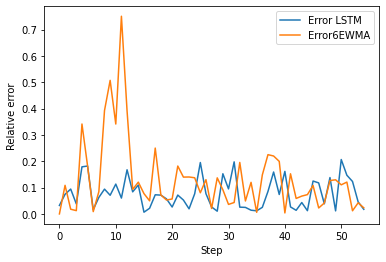

Anomalies
--------------------------------
Relative error:  [0.20652517]
Step:  50
Value:  [3687559.]
Predicted value:  [2925985.2]


In [77]:
#Relative error = |real_value - predicted value|/real_value = absolute_error/real_value

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

relative_error = abs(test_set.values[0:len(prediction)]-prediction)/test_set.values[0:len(prediction)]
plt.plot(relative_error, label='Error LSTM')

df = pd.read_csv('clean_dataset_20160109.csv')
df.head()
df['Error6EWMA'] = abs(df['B'].ewm(span=1).mean() - df['B'].ewm(span=6).mean())/df['B'].ewm(span=1).mean()
df['Error6EWMA'][0:len(prediction)].plot()

plt.xlabel('Step')
plt.ylabel('Relative error')
plt.legend()
plt.show()

print("Anomalies")
for element in range(len(test_set.values[0:len(prediction)])):
    if relative_error[element] > 0.20:
        print("--------------------------------")
        print("Relative error: ", relative_error[element])
        print("Step: ", element)
        print("Value: ", test_set.values[element])
        print("Predicted value: ", prediction[element])